# Soil water capacity modelling  
## M. Vanclooster (UCL/AGRO/ELI:16/02/2017)

In this $\textit{Jupyter notebook}$,we develop an approach for modelling the soil moisture capacity curve. We use in this notebook the symbolic calculating capacities of $\textit{Python}$. We therefore rely on the $\textit{Sympy}$ library. 

Let's first redefine the libraries that we need in this notebook. 

In [2]:
# The libraries below are the same as in the previous notebook 
import os
import pandas as pd
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
%matplotlib inline
# Getting current directory
cdir = 'C:/Users/vanclooster/Hubic/Documents/2018/Documents2018/cours/Hydrodynamiques des sols/Support Python'

# We add now the library that allows to perform symbolic calculations
from sympy import *

Lets' start by defining the symbolic variables with which we are going to work

In [3]:
h = Symbol('h')
th = Symbol('th')
alfa = Symbol('alfa')
ths = Symbol('ths')
thr = Symbol('thr')
n = Symbol('n')

We define the moisture retention curve as in previous notebook. Yet, this is now done in symbolic format, and hence no numerical values are assigned to the variables yet. 

In [4]:
th = thr+(ths-thr)/(1+(alfa*h)**n)**(1-1/n)

We will now introduce the differential moisture capacity. By definition, this is equal to the negative of the slope of the moisture retention curve. Hence: 

\begin{equation}
C(h) =-\frac {\partial \theta}{\partial h} 
\end{equation}

Using the symbolic calculator of $\textit{Sympy}$, we obtain the closed-form expression of this moisture capacity

In [5]:
c=-diff(th,h)

In [6]:
c

-n*(alfa*h)**n*(-1 + 1/n)*(-thr + ths)*((alfa*h)**n + 1)**(-1 + 1/n)/(h*((alfa*h)**n + 1))

Yep, this is indeed the formula we need to obtain a closed-form expression of the differential water capacity: 

\begin{equation}
    C(h)=\frac{n(\alpha h)^{n}(-1 + 1/n)(-\theta_{r} + \theta_{s})((\alpha h)^{n} + 1)^{(-1 + 1/n)}}{h((\alpha h)^{n} + 1)}
\end{equation}

We can asssign numerical values to this curve as was done in previous notebook. We first define $\textit{h}$ and numerical values for the model parameters. 

In [11]:
# Independent variable (pF and h (cm))
pf = np.arange(0, 7, 0.1)
h_num = 10**pf #cm!

# Hydraulic parameters
thr_num = 0.01
ths_num = 0.4
alfa_num = 0.001
n_num = 1.1
m_num = 1-1/n_num

Subsequently, we calculate the values of the capacity. We copy and paste the previously obtained equation and change the parameters to its numerical values.

In [12]:
c=-n_num*(alfa_num*h_num)**n_num*(-1 + 1/n_num)*(-thr_num + ths_num)*((alfa_num*h_num)**n_num + 1)**(-1 + 1/n_num)/(h_num*((alfa_num*h_num)**n_num + 1))

In [13]:
c

array([1.95356208e-05, 1.99875154e-05, 2.04489353e-05, 2.09197851e-05,
       2.13998666e-05, 2.18888452e-05, 2.23862057e-05, 2.28911945e-05,
       2.34027437e-05, 2.39193744e-05, 2.44390700e-05, 2.49591149e-05,
       2.54758897e-05, 2.59846140e-05, 2.64790286e-05, 2.69510116e-05,
       2.73901298e-05, 2.77831372e-05, 2.81134557e-05, 2.83607075e-05,
       2.85004163e-05, 2.85040630e-05, 2.83397501e-05, 2.79737801e-05,
       2.73734406e-05, 2.65111364e-05, 2.53696645e-05, 2.39478828e-05,
       2.22654229e-05, 2.03647506e-05, 1.83091528e-05, 1.61762964e-05,
       1.40485321e-05, 1.20023731e-05, 1.00998454e-05, 8.38355743e-06,
       6.87589739e-06, 5.58150293e-06, 4.49154771e-06, 3.58844893e-06,
       2.85004163e-06, 2.25277107e-06, 1.77383914e-06, 1.39245537e-06,
       1.09042071e-06, 8.52265818e-07, 6.65123126e-07, 5.18461211e-07,
       4.03765641e-07, 3.14216639e-07, 2.44390700e-07, 1.89998345e-07,
       1.47661330e-07, 1.14727744e-07, 8.91210902e-08, 6.92186061e-08,
      

We subsequently visualise the results...

Text(0.5,0,'pF')

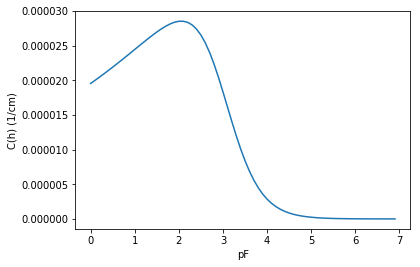

In [14]:
plt.plot(pf,c);
plt.ylabel('C(h) (1/cm)')
plt.xlabel('pF')

As in previous notebook, we can analyse the sensitivity of some parameters on the differential moisture capacity. 